# Spherical Harmonics

## Introduction

Spherical harmonics are a complete set of orthonormal functions defined on the surface of a sphere. They arise naturally as solutions to Laplace's equation in spherical coordinates and play a fundamental role in quantum mechanics, electromagnetism, geophysics, and computer graphics.

## Mathematical Foundation

### Laplace's Equation in Spherical Coordinates

Laplace's equation in three dimensions is:

$$\nabla^2 f = 0$$

In spherical coordinates $(r, \theta, \phi)$, this becomes:

$$\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 \frac{\partial f}{\partial r}\right) + \frac{1}{r^2 \sin\theta}\frac{\partial}{\partial \theta}\left(\sin\theta \frac{\partial f}{\partial \theta}\right) + \frac{1}{r^2 \sin^2\theta}\frac{\partial^2 f}{\partial \phi^2} = 0$$

### Definition of Spherical Harmonics

The spherical harmonics $Y_l^m(\theta, \phi)$ are defined as:

$$Y_l^m(\theta, \phi) = \sqrt{\frac{(2l+1)}{4\pi}\frac{(l-m)!}{(l+m)!}} P_l^m(\cos\theta) e^{im\phi}$$

where:
- $l \geq 0$ is the degree (non-negative integer)
- $m$ is the order with $-l \leq m \leq l$
- $P_l^m(x)$ are the associated Legendre polynomials
- $\theta \in [0, \pi]$ is the polar angle (colatitude)
- $\phi \in [0, 2\pi)$ is the azimuthal angle

### Associated Legendre Polynomials

The associated Legendre polynomials are defined by:

$$P_l^m(x) = (-1)^m (1-x^2)^{m/2} \frac{d^m}{dx^m} P_l(x)$$

where $P_l(x)$ are the Legendre polynomials given by Rodrigues' formula:

$$P_l(x) = \frac{1}{2^l l!} \frac{d^l}{dx^l}(x^2-1)^l$$

### Orthonormality

Spherical harmonics form a complete orthonormal basis on the sphere:

$$\int_0^{2\pi} \int_0^{\pi} Y_l^m(\theta, \phi)^* Y_{l'}^{m'}(\theta, \phi) \sin\theta \, d\theta \, d\phi = \delta_{ll'} \delta_{mm'}$$

### Real Spherical Harmonics

For visualization, we often use real spherical harmonics:

$$Y_{lm} = \begin{cases}
\frac{i}{\sqrt{2}}\left(Y_l^m - (-1)^m Y_l^{-m}\right) & \text{if } m < 0 \\
Y_l^0 & \text{if } m = 0 \\
\frac{1}{\sqrt{2}}\left(Y_l^{-m} + (-1)^m Y_l^{m}\right) & \text{if } m > 0
\end{cases}$$

## Applications

1. **Quantum Mechanics**: Angular part of hydrogen atom wavefunctions
2. **Electromagnetism**: Multipole expansion of charge distributions
3. **Geophysics**: Earth's gravitational and magnetic field modeling
4. **Computer Graphics**: Environment mapping and global illumination

/tmp/ipykernel_161789/4119094623.py:26: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y = sph_harm(m, l, phi, theta)


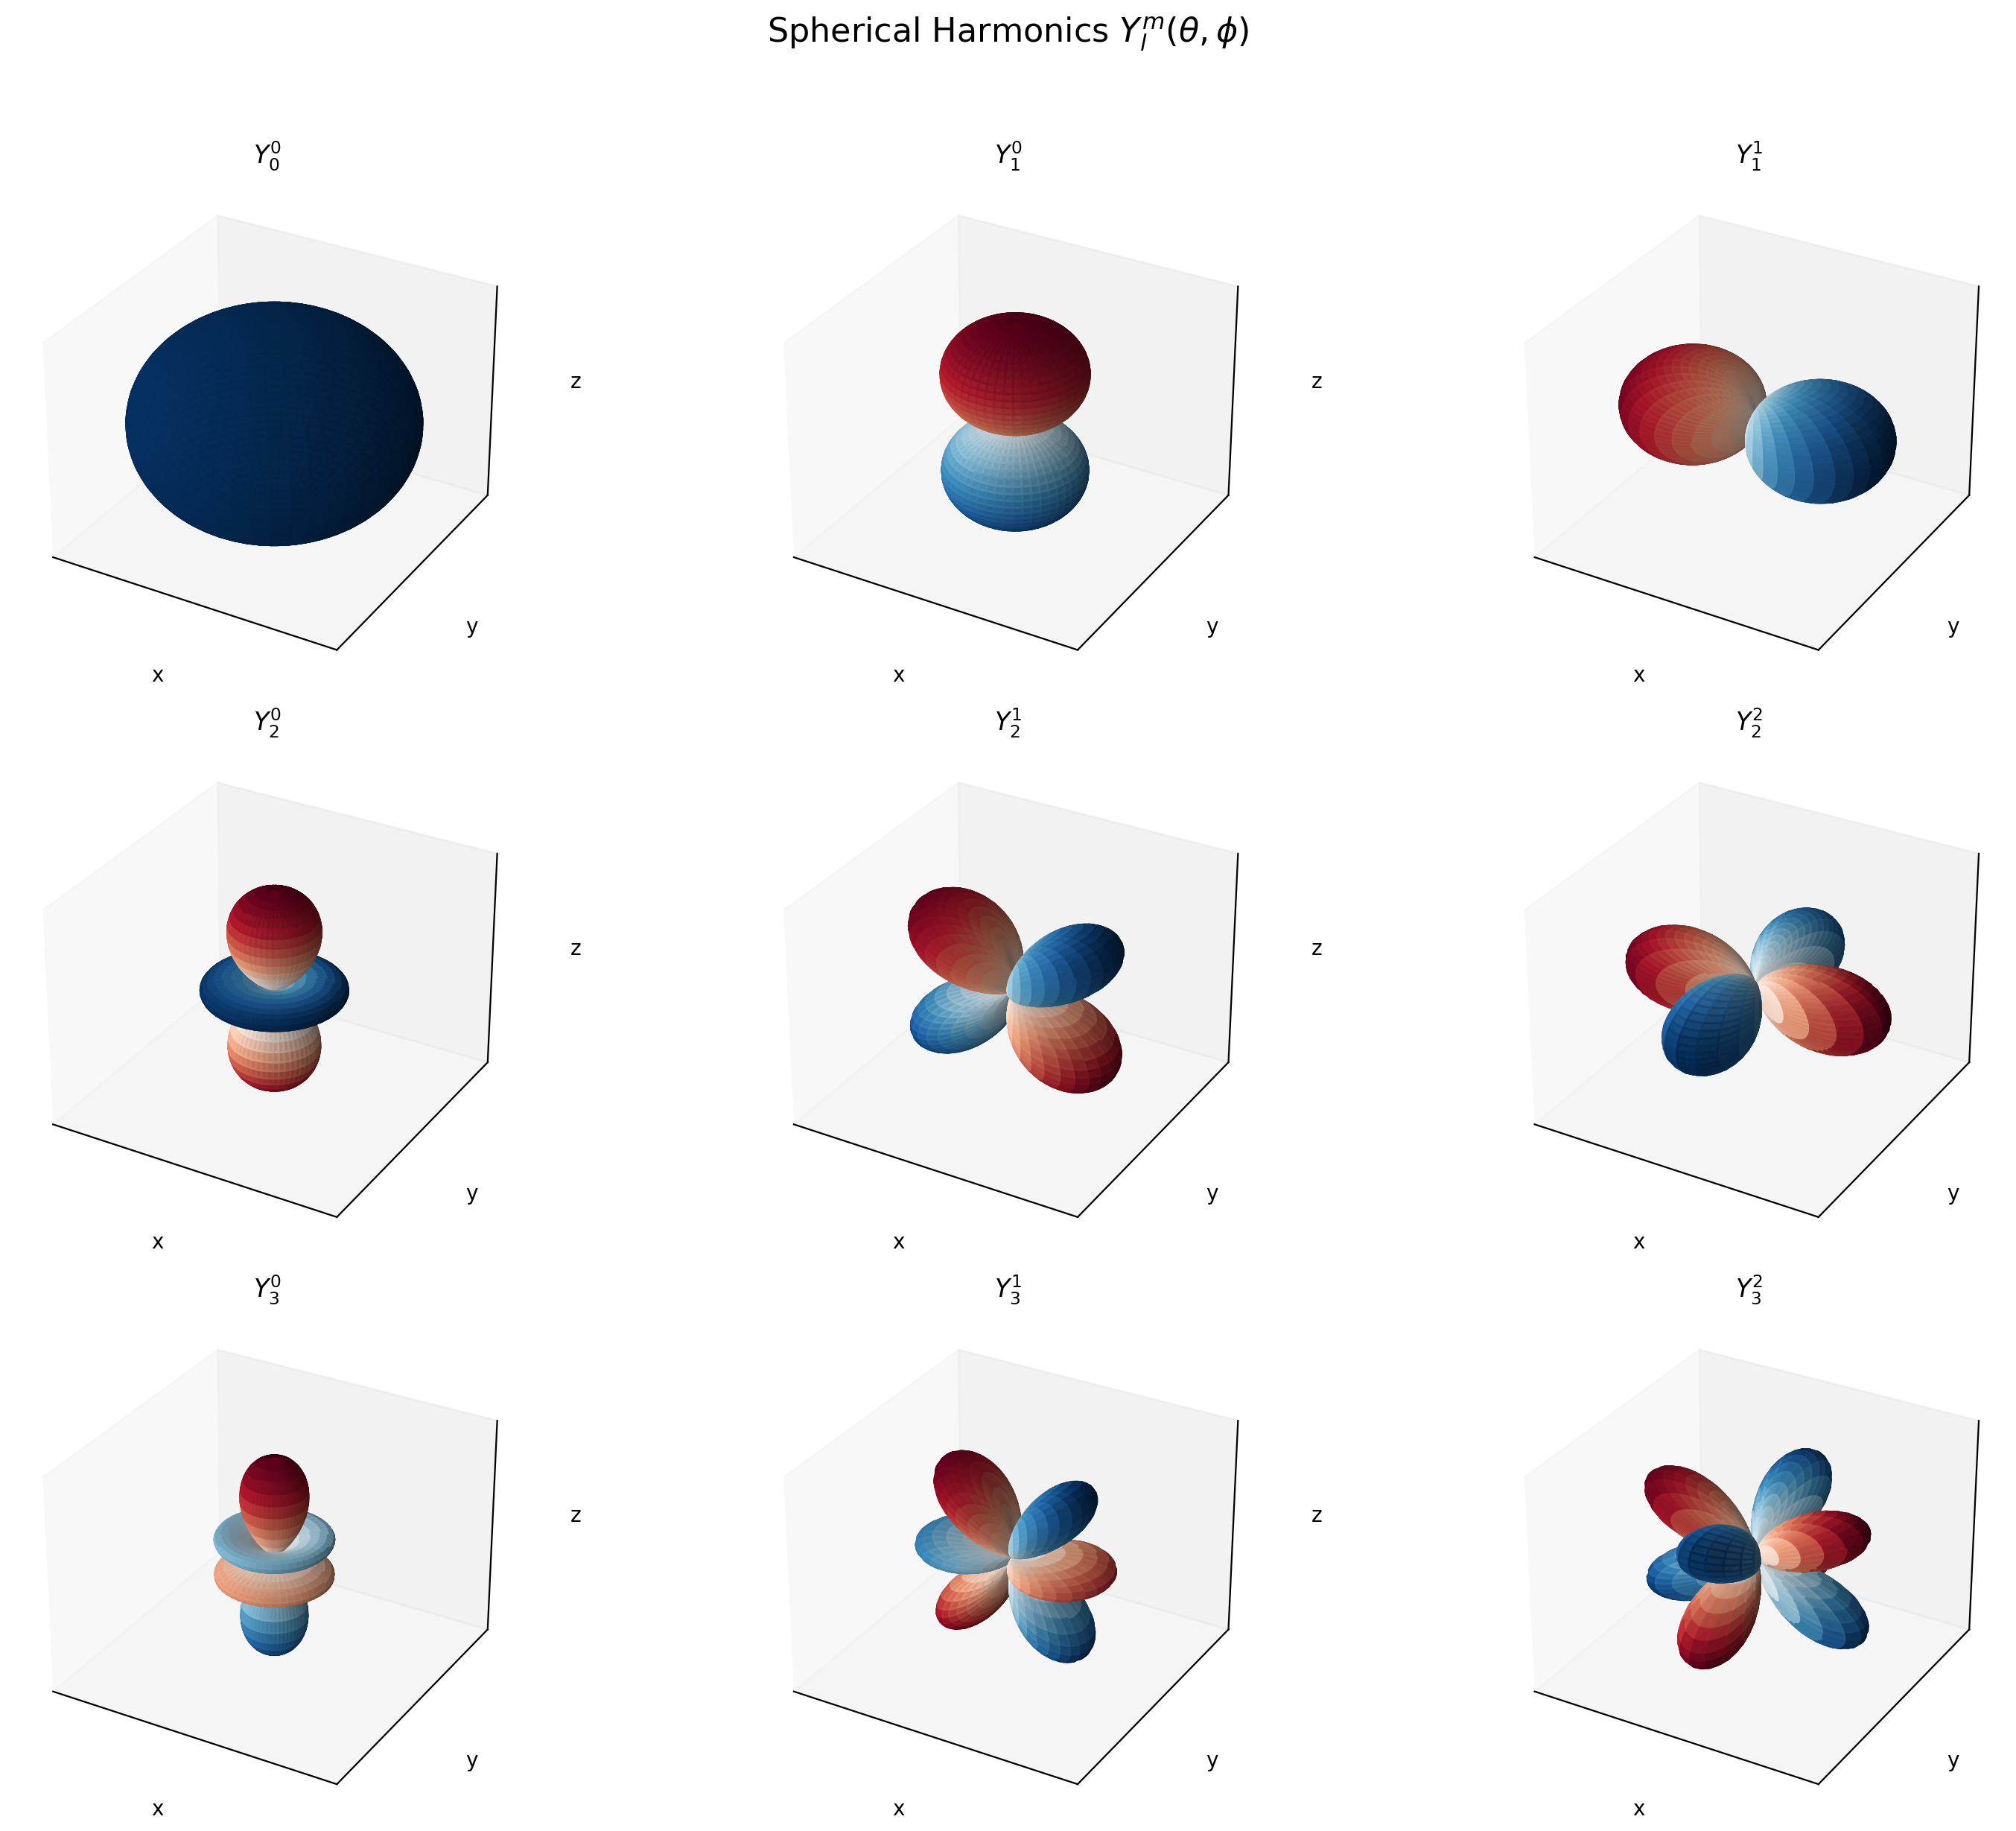

Spherical harmonics visualization saved to 'plot.png'


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D

# Set up figure for multiple spherical harmonics
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Spherical Harmonics $Y_l^m(\\theta, \\phi)$', fontsize=16, y=1.02)

# Create grid of theta and phi values
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Define the spherical harmonics to visualize
harmonics = [
    (0, 0), (1, 0), (1, 1),
    (2, 0), (2, 1), (2, 2),
    (3, 0), (3, 1), (3, 2)
]

for idx, (l, m) in enumerate(harmonics):
    ax = fig.add_subplot(3, 3, idx + 1, projection='3d')
    
    # Calculate spherical harmonic (scipy uses different convention: sph_harm(m, l, phi, theta))
    Y = sph_harm(m, l, phi, theta)
    
    # Take the real part for visualization
    if m >= 0:
        Y_real = np.real(Y)
    else:
        Y_real = np.imag(Y)
    
    # Convert to Cartesian coordinates
    # Use |Y| as the radius, colored by the sign of Y
    r = np.abs(Y_real)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    # Color by the sign of Y_real
    colors = np.where(Y_real >= 0, Y_real, Y_real)
    
    # Plot surface
    surf = ax.plot_surface(x, y, z, facecolors=plt.cm.RdBu_r((colors - colors.min()) / 
                          (colors.max() - colors.min() + 1e-10)),
                          rstride=2, cstride=2, antialiased=True, alpha=0.9)
    
    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'$Y_{{{l}}}^{{{m}}}$', fontsize=12)
    
    # Set equal aspect ratio
    max_range = np.max(r) * 1.1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])
    
    # Remove axis clutter for cleaner visualization
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()
plt.savefig('spherical_harmonics_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("Spherical harmonics visualization saved to 'plot.png'")

In [2]:
# Verify orthonormality numerically
print("Numerical Verification of Orthonormality")
print("=" * 45)

# Create finer grid for integration
n_theta = 200
n_phi = 400
theta_int = np.linspace(0, np.pi, n_theta)
phi_int = np.linspace(0, 2 * np.pi, n_phi)
dtheta = theta_int[1] - theta_int[0]
dphi = phi_int[1] - phi_int[0]

theta_grid, phi_grid = np.meshgrid(theta_int, phi_int)

def compute_inner_product(l1, m1, l2, m2):
    """Compute the inner product of two spherical harmonics."""
    Y1 = sph_harm(m1, l1, phi_grid, theta_grid)
    Y2 = sph_harm(m2, l2, phi_grid, theta_grid)
    
    # Integrate over the sphere
    integrand = np.conj(Y1) * Y2 * np.sin(theta_grid)
    integral = np.sum(integrand) * dtheta * dphi
    
    return integral

# Test orthonormality for selected pairs
test_pairs = [
    ((0, 0), (0, 0)),   # Same harmonic - should be 1
    ((1, 0), (1, 0)),   # Same harmonic - should be 1
    ((2, 1), (2, 1)),   # Same harmonic - should be 1
    ((0, 0), (1, 0)),   # Different l - should be 0
    ((1, 0), (1, 1)),   # Different m - should be 0
    ((2, 1), (3, 1)),   # Different l - should be 0
]

print(f"{'Y_l1^m1':<12} {'Y_l2^m2':<12} {'<Y1|Y2>':<20} {'Expected':<10}")
print("-" * 55)

for (l1, m1), (l2, m2) in test_pairs:
    result = compute_inner_product(l1, m1, l2, m2)
    expected = 1.0 if (l1 == l2 and m1 == m2) else 0.0
    print(f"Y_{l1}^{m1:<8} Y_{l2}^{m2:<8} {result.real:>8.6f}           {expected:.1f}")

Numerical Verification of Orthonormality
Y_l1^m1      Y_l2^m2      <Y1|Y2>              Expected  
-------------------------------------------------------
Y_0^0        Y_0^0        1.002485           1.0
Y_1^0        Y_1^0        1.002444           1.0


/tmp/ipykernel_161789/3231234538.py:17: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y1 = sph_harm(m1, l1, phi_grid, theta_grid)
/tmp/ipykernel_161789/3231234538.py:18: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y2 = sph_harm(m2, l2, phi_grid, theta_grid)


Y_2^1        Y_2^1        1.002506           1.0
Y_0^0        Y_1^0        0.000000           0.0
Y_1^0        Y_1^1        0.000000           0.0


Y_2^1        Y_3^1        -0.000000           0.0


In [3]:
# Demonstrate expansion of a function in spherical harmonics
print("\nExpansion of a Function in Spherical Harmonics")
print("=" * 47)

# Define a test function on the sphere
def test_function(theta, phi):
    """A simple function to expand: f(theta, phi) = cos(theta) + sin(theta)*cos(phi)"""
    return np.cos(theta) + np.sin(theta) * np.cos(phi)

# Calculate expansion coefficients
f_values = test_function(theta_grid, phi_grid)

print("\nExpansion coefficients for f(θ,φ) = cos(θ) + sin(θ)cos(φ):")
print("-" * 55)

l_max = 3
coefficients = {}

for l in range(l_max + 1):
    for m in range(-l, l + 1):
        Y_lm = sph_harm(m, l, phi_grid, theta_grid)
        
        # Compute coefficient: c_lm = integral of f * Y_lm^* sin(theta) dtheta dphi
        integrand = f_values * np.conj(Y_lm) * np.sin(theta_grid)
        c_lm = np.sum(integrand) * dtheta * dphi
        
        if np.abs(c_lm) > 1e-6:
            coefficients[(l, m)] = c_lm
            print(f"c_{l}^{m:+d} = {c_lm.real:+.6f} {'+' if c_lm.imag >= 0 else ''}{c_lm.imag:.6f}i")

print("\nNote: cos(θ) corresponds to Y_1^0 and sin(θ)cos(φ) involves Y_1^{±1}")


Expansion of a Function in Spherical Harmonics

Expansion coefficients for f(θ,φ) = cos(θ) + sin(θ)cos(φ):
-------------------------------------------------------
c_0^+0 = +0.006978 +0.000000i
c_1^-1 = +1.454457 +0.000000i
c_1^+0 = +2.051655 +0.000000i
c_1^+1 = -1.454457 +0.000000i


/tmp/ipykernel_161789/102774460.py:21: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y_lm = sph_harm(m, l, phi_grid, theta_grid)


c_2^-2 = +0.007166 -0.000000i
c_2^-1 = +0.004777 +0.000000i
c_2^+0 = -0.001950 +0.000000i
c_2^+1 = -0.004777 +0.000000i
c_2^+2 = +0.007166 +0.000000i


c_3^-3 = +0.007008 -0.000000i
c_3^-2 = +0.004292 +0.000000i
c_3^+0 = -0.000195 +0.000000i


c_3^+2 = +0.004292 -0.000000i
c_3^+3 = -0.007008 -0.000000i

Note: cos(θ) corresponds to Y_1^0 and sin(θ)cos(φ) involves Y_1^{±1}


## Summary

In this notebook, we have:

1. **Derived the mathematical foundation** of spherical harmonics from Laplace's equation
2. **Visualized** spherical harmonics for various values of $l$ and $m$
3. **Verified orthonormality** through numerical integration
4. **Demonstrated function expansion** using spherical harmonic coefficients

### Key Takeaways

- Spherical harmonics form a complete orthonormal basis for functions on the sphere
- The degree $l$ determines the number of nodal lines, while $m$ determines the azimuthal structure
- Any square-integrable function on the sphere can be expanded as a sum of spherical harmonics
- Applications span quantum mechanics (angular momentum eigenstates), geophysics (gravitational fields), and computer graphics (environment lighting)